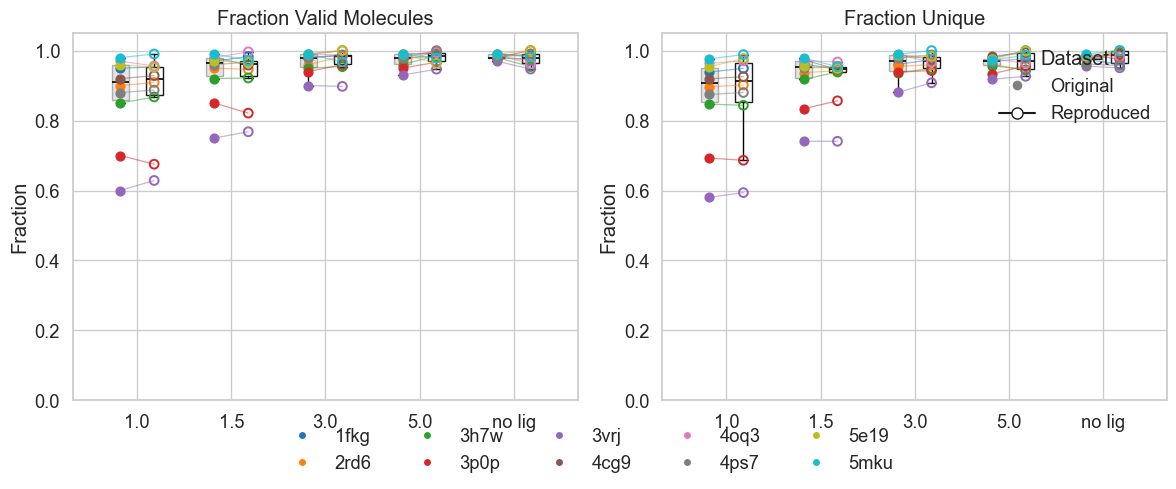

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

np.random.seed(0)

# x positions and labels
x_vals = np.arange(5)
x_labels = ['1.0', '1.5', '3.0', '5.0', 'no lig']

pdb_ids = ['1fkg','2rd6','3h7w','3p0p','3vrj','4cg9','4oq3','4ps7','5e19','5mku']
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
          'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

# valid_data: rows = PDBs (10), cols = x positions (5)
valid_data = np.array([
    [0.95,0.97,0.98,0.98,0.98],
    [0.90,0.95,0.96,0.97,0.98],
    [0.85,0.92,0.95,0.96,0.98],
    [0.70,0.85,0.94,0.95,0.98],
    [0.60,0.75,0.90,0.93,0.97],
    [0.92,0.98,0.99,0.99,0.99],
    [0.97,0.98,0.99,0.99,0.99],
    [0.88,0.96,0.98,0.98,0.98],
    [0.96,0.97,0.99,0.99,0.99],
    [0.98,0.99,0.99,0.99,0.99]
])

# reproduced = perturbed and clipped
valid_reproduced = valid_data + np.random.uniform(-0.03, 0.03, valid_data.shape)
valid_reproduced = np.clip(valid_reproduced, 0, 1)

unique_data = valid_data - np.random.uniform(0.00, 0.02, valid_data.shape)
unique_reproduced = unique_data + np.random.uniform(-0.03, 0.03, valid_data.shape)
unique_reproduced = np.clip(unique_reproduced, 0, 1)

# Build per-x lists: each element is length-10 array (one value per PDB)
orig_by_x_valid = [valid_data[:, j] for j in range(valid_data.shape[1])]
repr_by_x_valid = [valid_reproduced[:, j] for j in range(valid_reproduced.shape[1])]

orig_by_x_unique = [unique_data[:, j] for j in range(unique_data.shape[1])]
repr_by_x_unique = [unique_reproduced[:, j] for j in range(unique_reproduced.shape[1])]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# box width and x offsets
box_width = 0.18
left_offset = -0.18
right_offset = +0.18

# ---------- LEFT: Fraction Valid ----------
# Draw boxplots (behind)
bp_orig = axes[0].boxplot(
    orig_by_x_valid,
    positions=x_vals + left_offset,
    widths=box_width,
    patch_artist=True,
    showfliers=False,
    manage_ticks=False
)
bp_repr = axes[0].boxplot(
    repr_by_x_valid,
    positions=x_vals + right_offset,
    widths=box_width,
    patch_artist=True,
    showfliers=False,
    manage_ticks=False
)

# style the original boxes (light gray) and reproduced boxes (white with black edge)
for box in bp_orig['boxes']:
    box.set(facecolor='lightgray', edgecolor='gray', alpha=0.6, zorder=1)
for box in bp_repr['boxes']:
    box.set(facecolor='white', edgecolor='black', alpha=0.9, zorder=1)

# median colors
for m in bp_orig['medians']:
    m.set(color='black', linewidth=1.2, zorder=2)
for m in bp_repr['medians']:
    m.set(color='black', linewidth=1.2, zorder=2)

# Now scatter points and connecting horizontal lines per PDB
for i, (pdb, col) in enumerate(zip(pdb_ids, colors)):
    # original scatter (filled)
    axes[0].scatter(x_vals + left_offset, valid_data[i, :], color=col, s=40, zorder=3)
    # reproduced scatter (hollow)
    axes[0].scatter(x_vals + right_offset, valid_reproduced[i, :], facecolors='none',
                    edgecolors=col, linewidths=1.4, s=40, zorder=4)
    # connecting horizontal lines between orig and repr for each x
    for j in range(len(x_vals)):
        axes[0].plot([x_vals[j] + left_offset, x_vals[j] + right_offset],
                     [valid_data[i, j], valid_reproduced[i, j]],
                     color=col, alpha=0.5, linewidth=0.9, zorder=2)

axes[0].set_title('Fraction Valid Molecules')
axes[0].set_ylabel('Fraction')
axes[0].set_xticks(x_vals)
axes[0].set_xticklabels(x_labels)
axes[0].set_ylim(0, 1.05)

# ---------- RIGHT: Fraction Unique ----------
bp_orig2 = axes[1].boxplot(orig_by_x_unique, positions=x_vals + left_offset,
                           widths=box_width, patch_artist=True, showfliers=False)
bp_repr2 = axes[1].boxplot(repr_by_x_unique, positions=x_vals + right_offset,
                           widths=box_width, patch_artist=True, showfliers=False)

for box in bp_orig2['boxes']:
    box.set(facecolor='lightgray', edgecolor='gray', alpha=0.6, zorder=1)
for box in bp_repr2['boxes']:
    box.set(facecolor='white', edgecolor='black', alpha=0.9, zorder=1)
for m in bp_orig2['medians']:
    m.set(color='black', linewidth=1.2, zorder=2)
for m in bp_repr2['medians']:
    m.set(color='black', linewidth=1.2, zorder=2)

for i, (pdb, col) in enumerate(zip(pdb_ids, colors)):
    axes[1].scatter(x_vals + left_offset, unique_data[i, :], color=col, s=40, zorder=3)
    axes[1].scatter(x_vals + right_offset, unique_reproduced[i, :], facecolors='none',
                    edgecolors=col, linewidths=1.4, s=40, zorder=4)
    for j in range(len(x_vals)):
        axes[1].plot([x_vals[j] + left_offset, x_vals[j] + right_offset],
                     [unique_data[i, j], unique_reproduced[i, j]],
                     color=col, alpha=0.5, linewidth=0.9, zorder=2)

axes[1].set_title('Fraction Unique')
axes[1].set_ylabel('Fraction')
axes[1].set_xticks(x_vals)
axes[1].set_xticklabels(x_labels)
axes[1].set_ylim(0, 1.05)

# ---------- Legends ----------
# style legend (Original vs Reproduced)
style_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, label='Original'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='w', markeredgecolor='k', markersize=8, label='Reproduced')
]
leg1 = axes[1].legend(handles=style_legend, loc='upper right', frameon=False, title='Dataset')

# color legend for PDB IDs (small grid)
color_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=6, linestyle='None')
                 for c in colors]
# attach legend to figure (below)
leg2 = fig.legend(color_handles, pdb_ids, loc='lower center', ncol=5, frameon=False)

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.show()


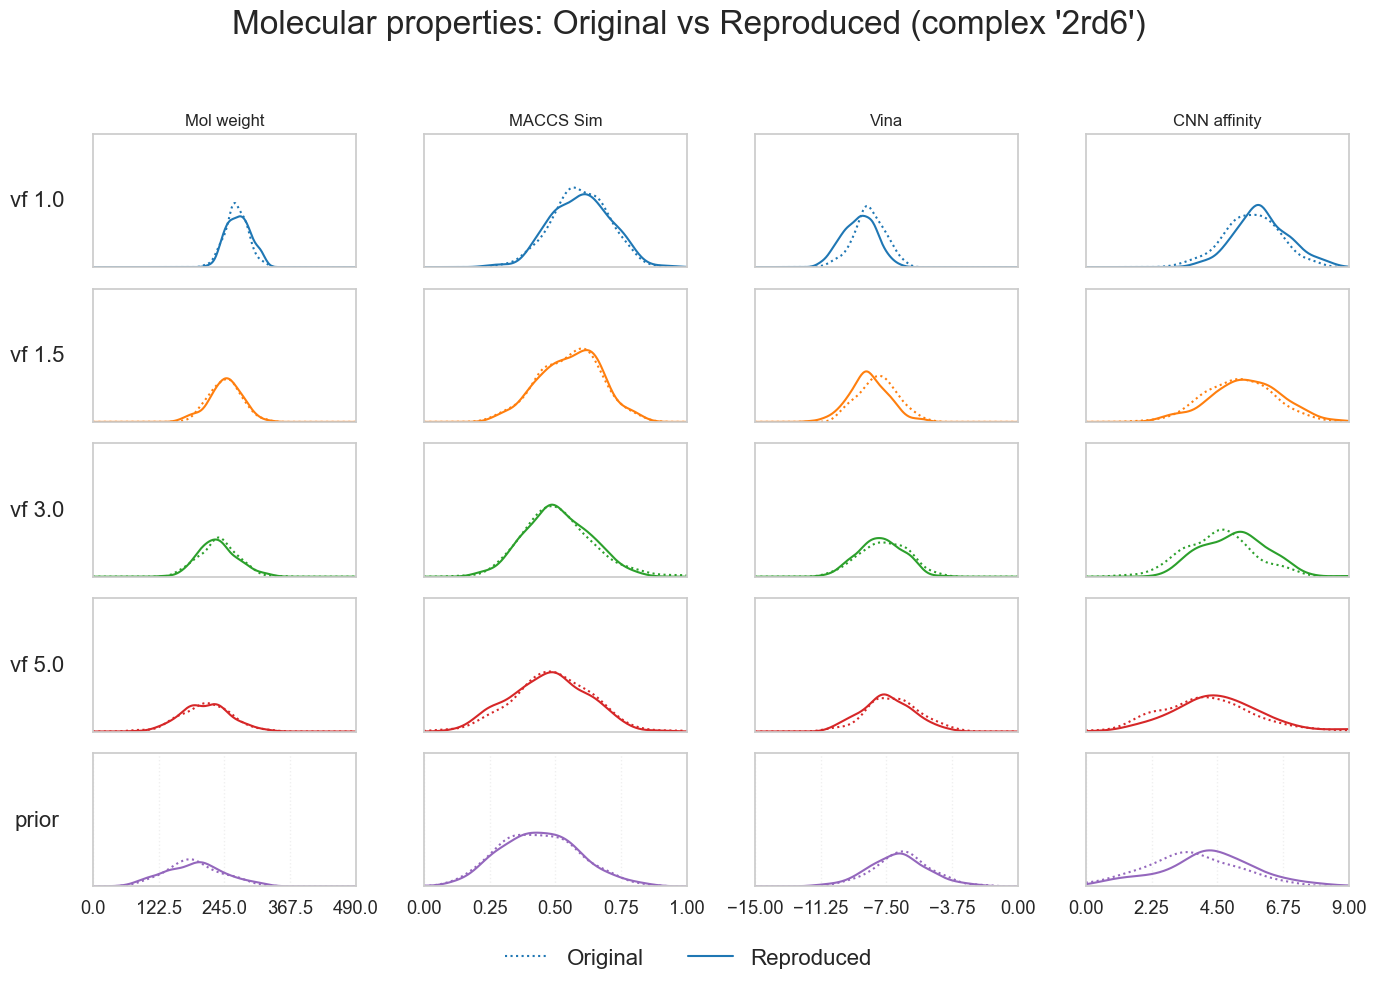

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Grid size
n_rows, n_cols = 5, 4
row_labels = ['vf 1.0', 'vf 1.5', 'vf 3.0', 'vf 5.0', 'prior']
col_labels = ['Mol weight', 'MACCS Sim', 'Vina', 'CNN affinity']
row_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Define x-limits per column
x_limits = [(0, 490), (0, 1), (-15, 0), (0, 9)]
ylims = [(0, 0.04), (0, 6), (0, 1), (0, 1)]

# Generate example data within roughly correct ranges
np.random.seed(0)
data_orig = np.zeros((n_rows, n_cols, 200))
data_repr = np.zeros((n_rows, n_cols, 200))

# Mol weight (0,500)
for i in range(n_rows):
    data_orig[i,0] = np.random.normal(270-i*20, 22+i*8, size=(200))
    data_repr[i,0] = np.random.normal(270-i*20, 22+i*8, size=(200))


# MACCS Sim (0,1)
for i in range(n_rows):
    data_orig[i,1] = np.random.normal(0.6-i*0.04, 0.11+i*0.01, size=(200))
    data_repr[i,1] = np.random.normal(0.6-i*0.04, 0.11+i*0.01, size=(200))

# Vina (-14,0)
for i in range(n_rows):
    data_orig[i,2] = np.random.normal(-9+i*0.5, 0.9+i*0.2, size=(200))
    data_repr[i,2] = np.random.normal(-8.5+i*0.5, 0.9+i*0.2, size=(200))

# CNN affinity (0,10)
for i in range(n_rows):
    data_orig[i,3] = np.random.normal(6-i*0.5, 0.9+i*0.2, size=(200))
    data_repr[i,3] = np.random.normal(5.7-i*0.5, 0.9+i*0.2, size=(200))

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Loop through grid cells
for i in range(n_rows):
    for j in range(n_cols):
        ax = axes[i, j]
        color = row_colors[i]
        
        # Estimate densities
        kde1 = gaussian_kde(data_orig[i, j])
        kde2 = gaussian_kde(data_repr[i, j])
        x_min, x_max = x_limits[j]
        y_min, y_max = ylims[j]
        x_grid = np.linspace(x_min, x_max, 300)
        
        # Original: solid, Reproduced: dotted
        ax.plot(x_grid, kde1(x_grid), color=color, lw=1.5, label='Original' if (i, j) == (0, 0) else "")
        ax.plot(x_grid, kde2(x_grid), color=color, lw=1.5, linestyle=':', label='Reproduced' if (i, j) == (0, 0) else "")
        
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.grid(alpha=0.3, linestyle=':')
        ax.set_yticks([])
        
        # Only show x-labels on bottom row
        if i == n_rows - 1:
            ax.set_xticks(np.linspace(x_min, x_max, 5))
        else:
            ax.set_xticks([])
        # Only show y-labels on left column
        # if j == 0:
        #     ax.set_yticks([0, 0.005, 0.01, 0.015, 0.02])  # adjust as needed
        # else:
        #     ax.set_yticks([])

# Column titles
for j, label in enumerate(col_labels):
    axes[0, j].set_title(label, fontsize=12)

# Row labels
for i, label in enumerate(row_labels):
    axes[i, 0].set_ylabel(label, rotation=0, labelpad=40, fontsize=16, va='center')

# Global legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles[::-1], labels, loc='lower center', ncol=2, frameon=False, fontsize=16)

# Overall title
fig.suptitle("Molecular properties: Original vs Reproduced (complex '2rd6')", fontsize=24)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
